In [57]:
for aa in range(2):
   # print(aa, 'a')
    for bb in range(2):
    #    print(bb, 'b')
        for cc in range(2):
     #       print(cc, 'c')
      #      print('iter', aa, bb, cc)
            print((-1) ** aa * (-1) ** bb * (-1) ** cc)

1
-1
-1
1
-1
1
1
-1


In [12]:
for aa in range(2):
    print(aa)

0
1


In [ ]:
tz = tz - NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
            dx[:, aa] * np.log(dy[:, bb] + r) +
            dy[:, bb] * np.log(dx[:, aa] + r) -
            dz[:, cc] * np.arctan(dx[:, aa] * dy[:, bb] /
                                  (dz[:, cc] * r)))

In [13]:
g = inter_data.data.grid.grid

In [45]:
dx= np.vstack((g[:, 0] - vox_size[0], g[:, 0] + vox_size[0])).T
dy = np.vstack((g[:, 1] - vox_size[1] , g[:, 1] + vox_size[1])).T
dz = np.stack((g[:, 2] - vox_size[2], g[:, 2] + vox_size[2])).T


In [58]:
mu = np.array([1,-1,-1,1,-1,1,1,-1])

In [41]:
dx_matrix = np.repeat(dx, 4, axis=1)

In [55]:
dy_matrix = np.tile(np.repeat(dy, 2, axis=1), (1,2)).shape

In [46]:
dz_matrix = np.tile(dz, (1,4))
dz_matrix.shape

(125000, 8)

In [62]:
dx_matrix 

array([[0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       [0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       [0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       ..., 
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107],
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107],
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107]], dtype=object)

In [15]:
x_extent = inter_data.extent_rescaled.iloc[1] - inter_data.extent_rescaled.iloc[0]
y_extent = inter_data.extent_rescaled.iloc[3] - inter_data.extent_rescaled.iloc[2]
z_extent = inter_data.extent_rescaled.iloc[5] - inter_data.extent_rescaled.iloc[4]
vox_size = np.array([x_extent, y_extent, z_extent])/geo_data.resolution

In [11]:
d_x

array([ 0.01050215,  0.01791543,  0.00453034])

In [1]:
import theano.tensor as T
import theano
import numpy as np
import matplotlib.pyplot as plt
theano.config.compute_test_value = "ignore"


import sys, os
sys.path.append("../GeMpy")
sys.path.append("../")
# Importing GeMpy modules
import gempy as gp

In [3]:
lith = np.load('sandstone_lith.npy')

In [2]:
geo_data = gp.read_pickle('geo_data.pickle')

In [3]:
inter_data = gp.InterpolatorInput(geo_data, compile_theano=False)

I am in the setting
float32
I am here
[2, 2]


In [4]:
inter_data.__dict__

{'centers': X         721180
 Y    6.89349e+06
 Z       -3951.36
 dtype: object,
 'data': <gempy.DataManagement.InputData at 0x7f392ecb6b70>,
 'dtype': 'float32',
 'extent_rescaled': X     0.24084
 X    0.765948
 Y    0.186119
 Y     1.08189
 Z     0.33486
 Z    0.561377
 dtype: object,
 'interpolator': <gempy.DataManagement.InterpolatorInput.InterpolatorClass at 0x7f3990094e48>,
 'rescaling_factor': 97123.0,
 'u_grade': None}

In [11]:
k = inter_data.set_airbore_plane(2100, [5,5])

In [14]:
inter_data.extent_rescaled.iloc[0], inter_data.extent_rescaled

(0.24084047856841323, X     0.24084
 X    0.765948
 Y    0.186119
 Y     1.08189
 Z     0.33486
 Z    0.561377
 dtype: object)

In [89]:
z = 2100/inter_data.data.rescaling_factor
res_grav = np.array([5, 5])


In [90]:
g  = np.meshgrid(np.linspace(geo_data.extent[0], 
                             geo_data.extent[1], res_grav[0]),
                 np.linspace(geo_data.extent[2], 
                             geo_data.extent[3], res_grav[1]))
h = np.ones(res_grav[0]*res_grav[1])*z
i = np.vstack(map(np.ravel, g))

k = np.vstack((i, h) ).T.astype("float32")

In [15]:
gr.astype('float32')
 

array([[ 0.24084048,  0.18611927,  0.33485964],
       [ 0.24084048,  0.18611927,  0.33948243],
       [ 0.24084048,  0.18611927,  0.34410521],
       ..., 
       [ 0.76594782,  1.08189058,  0.55213094],
       [ 0.76594782,  1.08189058,  0.55675375],
       [ 0.76594782,  1.08189058,  0.56137651]], dtype=float32)

In [4]:
lith.nbytes

500000

In [3]:
#lith = np.load('sandstone_lith.npy')


### Compute distance

In [16]:
gr = inter_data.data.grid.grid.astype('float32')


In [17]:
x_1 = T.matrix()
x_2 = T.matrix()

sqd = T.sqrt(T.maximum(
    (x_1**2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2**2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd)

In [18]:
dist = eu(gr, k)

In [20]:
n1 = np.argsort(dist, axis=0)[:40,:]

In [21]:
n = np.indices((40,25))[1]

In [32]:
# Distances solved
dist[n1,n].shape, 40*25

((40, 25), 1000)

In [9]:
v = np.ones((40,1))


In [12]:
np.hstack((np.zeros((40,0)), v))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [33]:
sol = np.empty(0)
for i in range(25):
    sol = np.append(sol, lith[n1[:,i]])

In [45]:
from scipy.constants import G
G?

In [38]:
sol.reshape(40,25)[:, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  3.,
        2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
dist[n1,n][:, 0]

array([ 0.00100662,  0.00565226,  0.01027423,  0.01076713,  0.0121139 ,
        0.01484648,  0.01489858,  0.01830892,  0.01835119,  0.01913664,
        0.01952209,  0.02097053,  0.02121496,  0.02145661,  0.02193057,
        0.02216576,  0.02226771,  0.0235504 ,  0.02358201,  0.02376832,
        0.02414401,  0.02590423,  0.02610136,  0.02641462,  0.02674538,
        0.02818952,  0.02873194,  0.02876615,  0.0288117 ,  0.02899009,
        0.0299856 ,  0.03028427,  0.03069771,  0.03186667,  0.03212375,
        0.03216547,  0.03228385,  0.03264188,  0.03338841,  0.03375062], dtype=float32)

In [69]:
np.count_nonzero(dist), dist.shape[0]*25

(3124171, 3125000)

In [71]:
k

array([[  6.96000000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.86300000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.88475000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.90650000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.92825000e+06,   2.1000000

In [65]:
dist[:,0]

array([  22057.63476562,   21673.99414062,   21283.43945312, ...,
        100831.5078125 ,  100789.8984375 ,  100831.5078125 ], dtype=float32)

In [53]:
b = np.ones((6,6))
b[[[2,4], 3,4],[[0,0],1,2]] = 9
b

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
T.indice

In [9]:
_bool = dist>10000

In [68]:
np.unique(j)

array([ 0.,  1.,  2.,  3.,  4.], dtype=float32)

In [14]:
j = _bool * (lith+1)[:, np.newaxis]


In [15]:
np.unique(j), j.shape

(array([ 0.,  1.,  2.,  3.,  4.,  5.], dtype=float32), (125000, 25))

In [23]:
np.nonzero(j)[1]

array([ 0,  1,  2, ..., 21, 22, 23])

In [27]:
np.nonzero(j[:,0])

(array([     0,      1,      2, ..., 124997, 124998, 124999]),)

In [35]:
T.nonzero_values(T.reshape(_bool, (-1,1))).eval()

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [36]:
T.argmin?

In [80]:
dist_o = dist.argsort(axis=0)

In [81]:
dist_o

array([[    43,  27597,  57547, ...,  62499,  92444, 124999],
       [    45,  30099,  62545, ...,  59997,  92448, 117498],
       [    46,  30044,  62546, ...,  57493,  89999, 124949],
       ..., 
       [124952, 124952, 124951, ..., 122501,      2,      2],
       [124951, 124951,   2450, ...,      0,      1,      1],
       [124950, 124950, 124950, ..., 122500,      0,      0]])

In [89]:
s = dist_o[:200000, :]

In [83]:
np.save('select', s)

In [90]:
d = np.take(dist, s)
d.shape

(125000, 25)

### Substitute lith for densities

In [108]:
s

array([[    43,  27597,  57547, ...,  62499,  92444, 124999],
       [    45,  30099,  62545, ...,  59997,  92448, 117498],
       [    46,  30044,  62546, ...,  57493,  89999, 124949],
       ..., 
       [124952, 124952, 124951, ..., 122501,      2,      2],
       [124951, 124951,   2450, ...,      0,      1,      1],
       [124950, 124950, 124950, ..., 122500,      0,      0]])

In [102]:
lith_tile[[[0],[1]], s]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,1) (125000,25) 

In [104]:
lith_tile[[[0],[1]], s]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,1) (125000,25) 

In [91]:
lith_tile = np.tile(lith, (25,1)).T

In [105]:
lith_select = np.take(np.ravel(lith_tile), s)

In [106]:
lith_tile.shape, s.shape

((125000, 25), (125000, 25))

In [93]:
{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

In [94]:
lith_select.shape

(125000, 25)

In [107]:
np.unique(lith_select)

array([ 0.,  1.], dtype=float32)

In [61]:
np.place(lith_select, lith_select == 1, 2.61)
np.place(lith_select, lith_select == 2, 2.92)
np.place(lith_select, lith_select == 3, 3.1)
np.place(lith_select, lith_select == 4, 2.92)
np.place(lith_select, lith_select == 0, 2.61)

In [62]:
np.unique(lith_select)

array([ 2.6099999], dtype=float32)

### Compute volume

In [9]:
x_extent = geo_data.extent[1] - geo_data.extent[0]
y_extent = geo_data.extent[3] - geo_data.extent[2]
z_extent = geo_data.extent[5] - geo_data.extent[4]

In [11]:
x_extent = geo_data.extent[1] - geo_data.extent[0]
y_extent = geo_data.extent[3] - geo_data.extent[2]
z_extent = geo_data.extent[5] - geo_data.extent[4]
d_x = np.array([x_extent, y_extent, z_extent])/geo_data.resolution

In [14]:
vol = d_x[0]*d_x[1]*d_x[2]
d_x, vol

(array([ 1020.,  1740.,   440.]), 780912000.0)

array([[ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       ..., 
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.]], dtype=float32)

In [48]:
lith_tile.shape

(125000, 100)

In [62]:
T.copy?

In [4]:
a = geo_data.grid.grid.reshape(50,50,50, 3)

In [6]:
b = a[:,:,0,:]

In [16]:
geo_data.grid.grid

array([[  6.96000000e+05,   6.86300000e+06,  -2.00000000e+04],
       [  6.96000000e+05,   6.86300000e+06,  -1.95510195e+04],
       [  6.96000000e+05,   6.86300000e+06,  -1.91020410e+04],
       ..., 
       [  7.47000000e+05,   6.95000000e+06,   1.10204077e+03],
       [  7.47000000e+05,   6.95000000e+06,   1.55102039e+03],
       [  7.47000000e+05,   6.95000000e+06,   2.00000000e+03]], dtype=float32)

In [10]:
b = np.indices((50,50,50))
b []

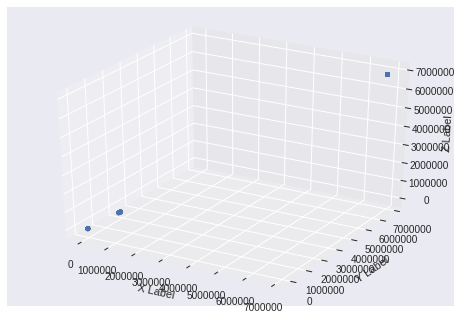

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = b[:,0]
ys = b[:,1]
zs = b[:,2]

ax.scatter(xs, ys, zs, )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()